# Geospatial Analysis

In [7]:
#import necessary libraries
import pandas as pd
import folium

In [8]:
#load dataset
df = pd.read_csv("C:/Users/manag/Cognifyz Projects/Restaurant.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Visualize the locations of restaurants 

In [17]:
#keeping only the columns I need
map_df = df[["Latitude", "Longitude","Restaurant Name"]]

#create a map at a fixed location
m = folium.Map(location=[map_df.Latitude.mean(), map_df.Longitude.mean()], zoom_start=12, control_scale=True)


#add points to the map
for index, location_info in map_df.iterrows():
    folium.Marker(
        [location_info["Latitude"], location_info["Longitude"]], 
        popup=location_info["Restaurant Name"], icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)
    
    
output_file = 'restaurants_map.html'
m.save(output_file)

# Analyze the distribution of restaurants

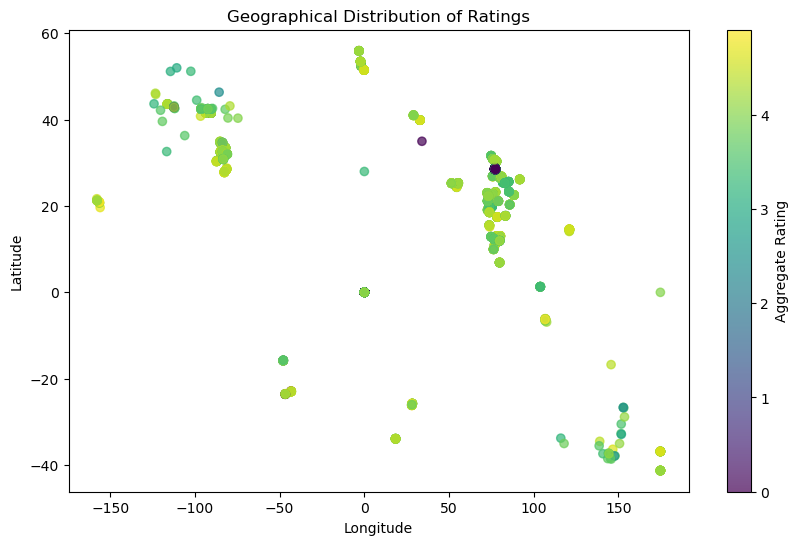

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of Latitude and Longitude colored by Aggregate Rating
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Aggregate rating'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Ratings')
plt.show()


# Calculate correlations

In [16]:
# Calculate correlations
latitude = df['Latitude'].corr(df['Aggregate rating'])
longitude = df['Longitude'].corr(df['Aggregate rating'])

print("Correlation between Latitude and Rating:", latitude)
print("Correlation between Longitude and Rating:",longitude)


Correlation between Latitude and Rating: 0.0005155806902359991
Correlation between Longitude and Rating: -0.11681757734540407


# Making sense of the correlations

> The correlation between longitude and restaurant ratings shows that there is no significant linear relationship. This suggests that the geographic location along the east-west axis does not directly influence the ratings.

> The correlation between latitude and restaurant ratings reveals a very weak negative relationship. While the relationship is weak, it indicates that ratings slightly decrease as latitude increases, though the effect is not substantial.

In analysis, it appears that restaurant location does not significantly determine its ratings. 
